# AdaBoost Classification on Breast Cancer Dataset
This notebook demonstrates how to use scikit-learn’s `AdaBoostClassifier` for binary classification.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.set_theme()

## Data Loading & Exploration
Load the breast cancer dataset and inspect its shape and class distribution.

In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0 = malignant, 1 = benign
print(f"Feature matrix shape: {X.shape}")

Feature matrix shape: (569, 30)


In [5]:
print("Class distribution:\n", y.value_counts())

Class distribution:
 target
1    357
0    212
Name: count, dtype: int64


In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

## Exploratory Visualization
Plot two features (`mean radius` vs `mean texture`) colored by class.

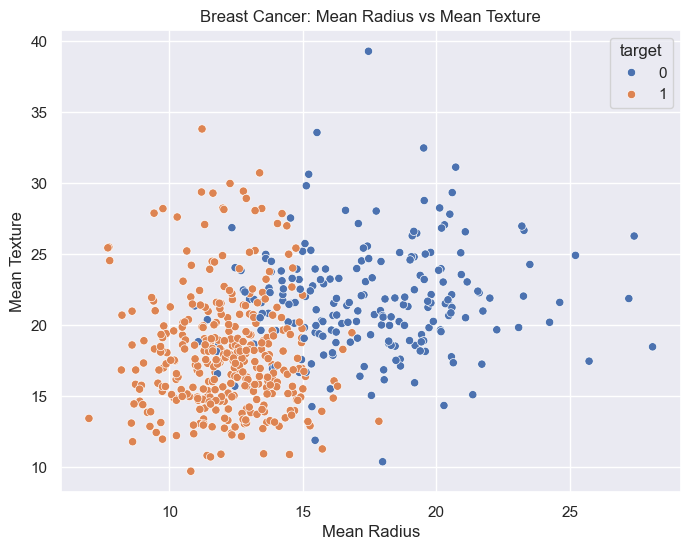

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['mean radius'], y=X['mean texture'], hue=y, palette='deep')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Breast Cancer: Mean Radius vs Mean Texture')
plt.show()

## Train/Test Split
Split data into 80% train and 20% test sets, stratifying on the label.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 455, Test samples: 114


## Training Default AdaBoost
Use decision stumps (`max_depth=1`) as weak learners.

In [10]:
base = DecisionTreeClassifier(max_depth=1, random_state=42)
adb = AdaBoostClassifier(estimator=base, random_state=42)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Test Accuracy: 0.956


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Confusion Matrix & Classification Report

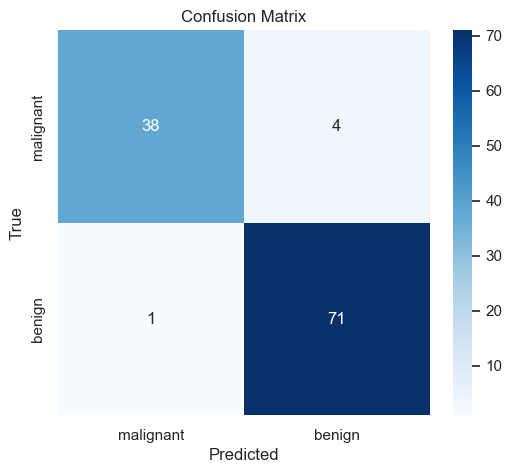

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Feature Importances
AdaBoost provides feature importances by weighted combination of weak learners.

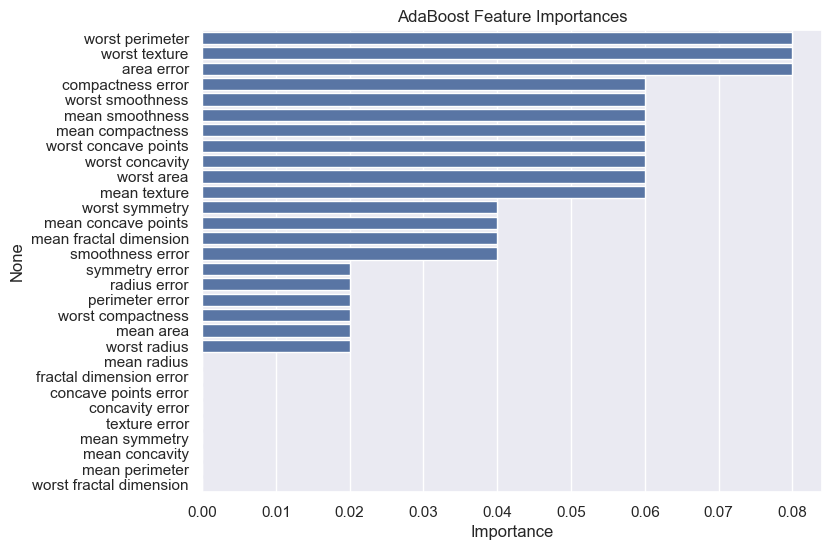

In [14]:
importances = adb.feature_importances_
fi = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=fi, y=fi.index)
plt.xlabel('Importance')
plt.title('AdaBoost Feature Importances')
plt.show()

## Decision Boundary (2D)
Retrain on two features and plot decision regions.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


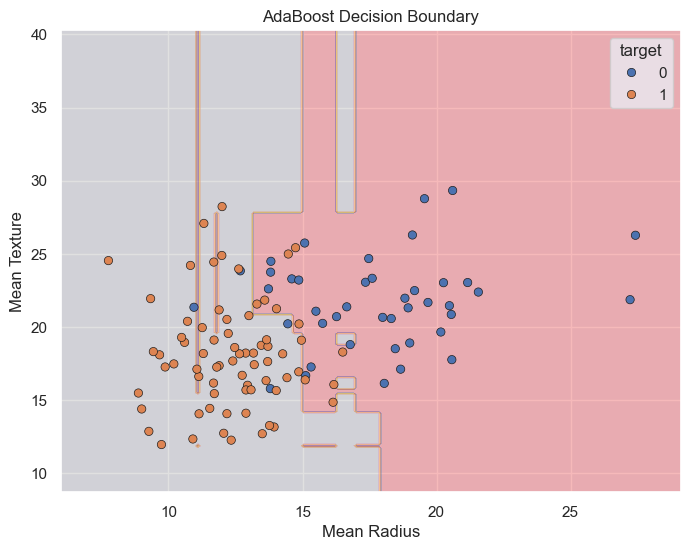

In [15]:
X2_train = X_train[['mean radius','mean texture']].values
X2_test = X_test[['mean radius','mean texture']].values
adb2 = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50, random_state=42
)
adb2.fit(X2_train, y_train)
xx, yy = np.meshgrid(
    np.linspace(X2_train[:,0].min()-1, X2_train[:,0].max()+1, 200),
    np.linspace(X2_train[:,1].min()-1, X2_train[:,1].max()+1, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = adb2.predict(grid).reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
sns.scatterplot(x=X2_test[:,0], y=X2_test[:,1], hue=y_test, palette='deep', edgecolor='k')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('AdaBoost Decision Boundary')
plt.show()

## Validation Curve: n_estimators
Plot train and CV accuracy vs. number of estimators.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

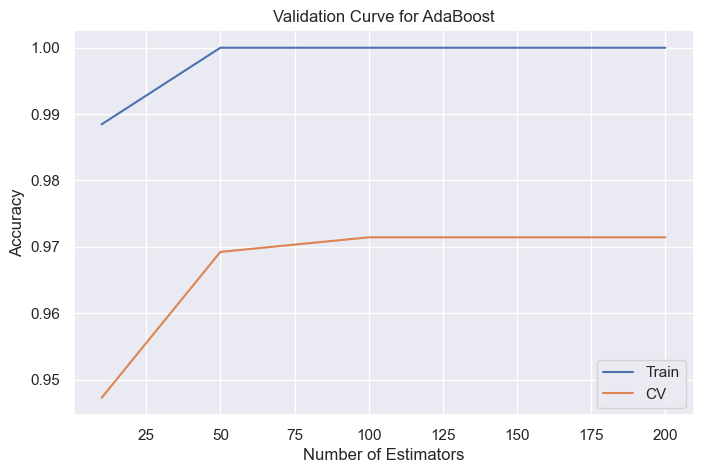

In [16]:
param_range = [10,50,100,200]
train_scores, test_scores = validation_curve(
    AdaBoostClassifier(estimator=base, random_state=42),
    X_train, y_train, param_name='n_estimators', param_range=param_range,
    cv=5, scoring='accuracy'
)
plt.figure(figsize=(8,5))
plt.plot(param_range, train_scores.mean(axis=1), label='Train')
plt.plot(param_range, test_scores.mean(axis=1), label='CV')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Validation Curve for AdaBoost')
plt.legend(); plt.grid(True); plt.show()

The optimal number of estimators is about 50, as the accuracy growth for CV slows down drastically after that.

## Effect of Learning Rate on AdaBoost Performance

Below we examine how the `learning_rate` hyperparameter affects test‐set accuracy. We fix the number of estimators at 50 and the weak learner as a decision stump (`max_depth=1`), then train models over a range of learning rates and plot their accuracy.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

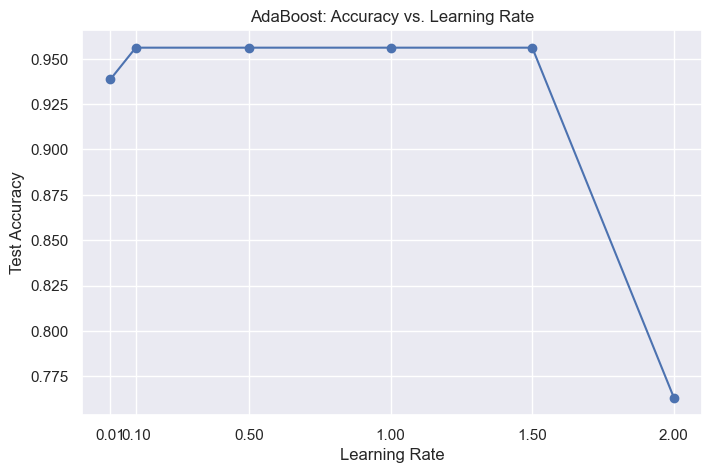

In [17]:
# Range of learning rates to try
learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]

accuracies = []
for lr in learning_rates:
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
        n_estimators=50,
        learning_rate=lr,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot
plt.figure(figsize=(8,5))
plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.title('AdaBoost: Accuracy vs. Learning Rate')
plt.xticks(learning_rates)
plt.grid(True)
plt.show()

## Discussion
- AdaBoost with decision stumps focuses on hard-to-classify examples by updating sample weights, building a strong classifier. It iteratively fits weak learners to re-weighted data, focusing on hard-to-classify examples and combining them into a strong classifier.  
- Whenever a classifier misclassifies a point, that point is weighted accordingly to its difficulty, and the next classifier is trained on that dataset with relative weights.
- From exploration, we've discovered the optimal number of estimators is 50 and learning rate is 0.1 for our dataset.